
# Proyecto 2 - Filtros sobre Imágenes
Este proyecto utiliza la base de datos **EMNIST Letters** para clasificar letras del alfabeto usando una red neuronal convolucional.  
Antes del entrenamiento, aplicamos un **filtro Gaussiano** como preprocesamiento.


In [14]:
!pip install tensorflow tensorflow_datasets matplotlib
!pip install emnist --quiet
!pip install extra-keras-datasets
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from emnist import extract_training_samples, extract_test_samples
import cv2
from extra_keras_datasets import emnist
import matplotlib.pyplot as plt



Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/letters/incomplete.CON3RB_3.1.0/emnist-train.tfrecord*...:   0%|   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/letters/incomplete.CON3RB_3.1.0/emnist-test.tfrecord*...:   0%|    …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/letters/3.1.0. Subsequent calls will reuse this data.


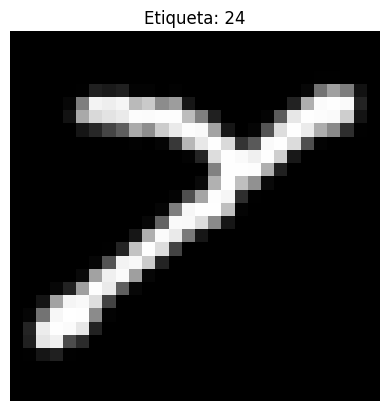

In [17]:

import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Cargar EMNIST Letters
ds_train, ds_test = tfds.load('emnist/letters', split=['train', 'test'], as_supervised=True)

# Convertir a arrays de NumPy
x_train, y_train = [], []
for image, label in tfds.as_numpy(ds_train):
    x_train.append(image)
    y_train.append(label)

x_test, y_test = [], []
for image, label in tfds.as_numpy(ds_test):
    x_test.append(image)
    y_test.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train) - 1  # Restar 1 para que las etiquetas vayan de 0 a 25
x_test = np.array(x_test)
y_test = np.array(y_test) - 1

# Mostramos una imagen
plt.imshow(x_train[0].squeeze(), cmap='gray')
plt.title(f"Etiqueta: {y_train[0]}")
plt.axis('off')
plt.show()

In [19]:

# Normalización de las imágenes
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Aplicamos el filtro Gaussiano (filtro de desenfoque)
def aplicar_filtro_gaussiano(x):
    return np.array([cv2.GaussianBlur(img, (3, 3), 0) for img in x])

x_train = aplicar_filtro_gaussiano(x_train)
x_test = aplicar_filtro_gaussiano(x_test)


In [20]:

# Expandimos para tener un formato (28, 28, 1)
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]


In [21]:

model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(26)  # 26 letras
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, validation_split=0.1)


Epoch 1/5
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.7420 - loss: 0.8640 - val_accuracy: 0.9007 - val_loss: 0.3012
Epoch 2/5
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 78s 30ms/step - accuracy: 0.9126 - loss: 0.2609 - val_accuracy: 0.9213 - val_loss: 0.2513
Epoch 3/5
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9301 - loss: 0.2043 - val_accuracy: 0.9243 - val_loss: 0.2376
Epoch 4/5
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 77s 31ms/step - accuracy: 0.9406 - loss: 0.1667 - val_accuracy: 0.9296 - val_loss: 0.2286
Epoch 5/5
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 85s 32ms/step - accuracy: 0.9491 - loss: 0.1382 - val_accuracy: 0.9286 - val_loss: 0.2254


In [23]:

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Precisión en test: {test_acc:.4f}")


463/463 - 4s - 8ms/step - accuracy: 0.9218 - loss: 0.2342
Precisión en test: 0.9218


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step


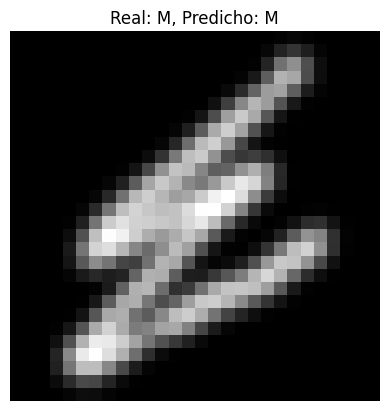

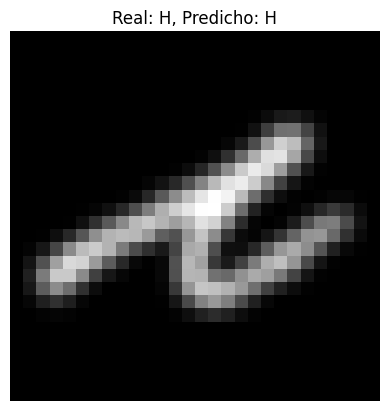

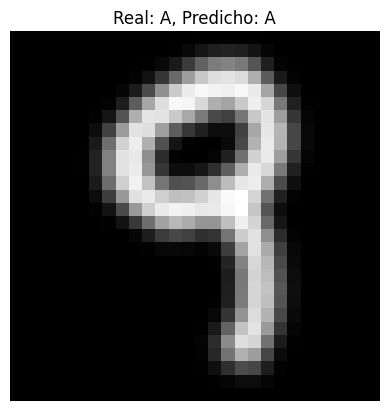

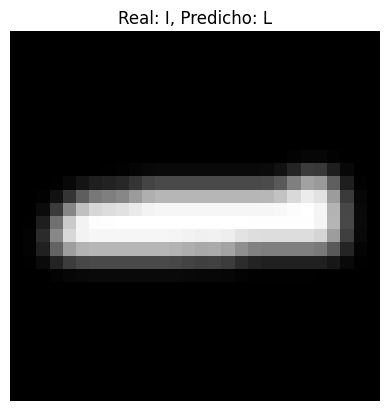

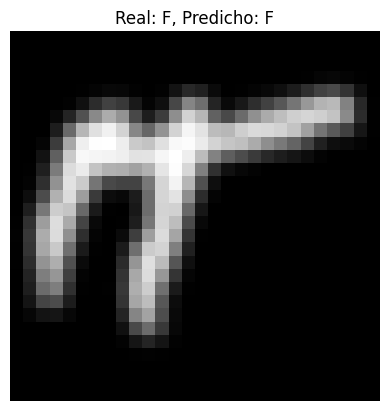

In [24]:

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

# Mostrar algunas predicciones
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Real: {chr(y_test[i] + 65)}, Predicho: {chr(np.argmax(predictions[i]) + 65)}")
    plt.axis('off')
    plt.show()



## filtro Gaussiano
Para este proyecto, se aplicó un **filtro Gaussiano** como preprocesamiento a las imágenes antes de entrenar la red neuronal.

Este filtro suaviza la imagen, reduciendo detalles pequeños y posibles ruidos. Esto permite que el modelo se enfoque en las formas generales de las letras, ayudando a mejorar la calidad del aprendizaje.

En este caso, se oberva que el filtro Gaussiano con kernel 3x3 fue suficiente para suavizar sin tener que borrar los trazos importantes de las letras.
